Results loaded from /content/mistral_benchmark_results.csv. Shape: (16, 9)
Results loaded from /content/mistral_benchmark_results2.csv. Shape: (4, 10)


Filtered Results DataFrame (First 5 rows):
                                model     task     lang      instr  accuracy  f1_score  inference_time  average_tokens  cosine_similarity             prompt_group               prompt_name
12  Mistral-7B-Instruct-v0.2 (Custom)  summary  English  zero-shot      0.95  0.221344        6.765799           53.75           0.488008  Dataset Original Prompt   Prompt0_DatasetOriginal
16     Mistral-7B-Instruct-v0.2 (LLM)  summary  English  zero-shot      1.00  0.093067        9.541407           98.65           0.454146           Custom Prompts      Prompt1_ConciseEvent
17     Mistral-7B-Instruct-v0.2 (LLM)  summary  English  zero-shot      0.90  0.046155       15.894877          188.35           0.443896           Custom Prompts   Prompt2_SystemAdminRole
18     Mistral-7B-Instruct-v0.2 (LLM)  summary  

/tmp/ipython-input-4-820294708.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/tmp/ipython-input-4-820294708.py:92: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/tmp/ipython-input-4-820294708.py:115: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


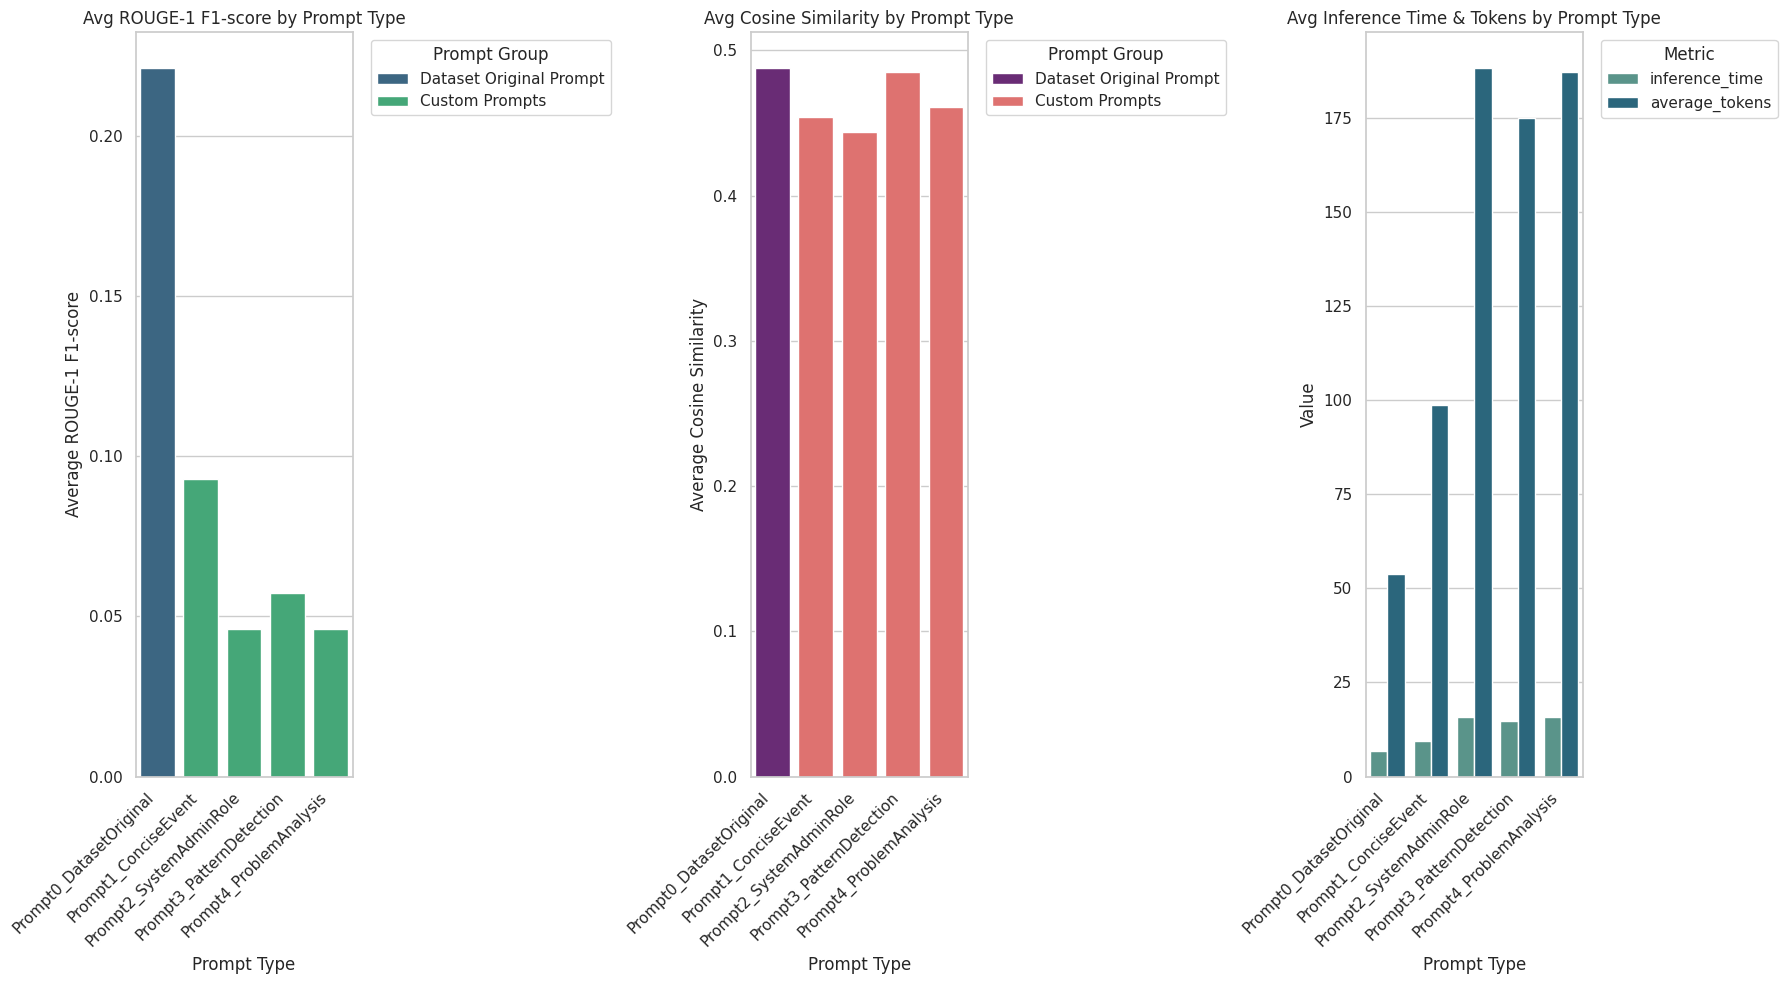


Analysis and visualization for Prompt Engineering Comparison complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


dataset_prompt_results_file = "/content/mistral_benchmark_results.csv"
custom_prompts_results_file = "/content/mistral_benchmark_results2.csv"

if os.path.exists(dataset_prompt_results_file) and os.path.exists(custom_prompts_results_file):
    df_dataset_prompt = pd.read_csv(dataset_prompt_results_file)
    df_custom_prompts = pd.read_csv(custom_prompts_results_file)

    print(f"Results loaded from {dataset_prompt_results_file}. Shape: {df_dataset_prompt.shape}")
    print(f"Results loaded from {custom_prompts_results_file}. Shape: {df_custom_prompts.shape}")
    print("\n")

else:
    print(f"Error: One or both results files not found. Please ensure they are uploaded correctly to /content/.")
    exit()



df_dataset_prompt['prompt_group'] = 'Dataset Original Prompt'

df_dataset_prompt['prompt_name'] = 'Prompt0_DatasetOriginal'

df_custom_prompts['prompt_group'] = 'Custom Prompts'


df_combined = pd.concat([df_dataset_prompt, df_custom_prompts], ignore_index=True)

df_filtered = df_combined[
    (df_combined['lang'] == 'English') &
    (df_combined['instr'] == 'zero-shot') &
    (df_combined['task'] == 'summary')
].copy()


for col in ['accuracy', 'f1_score', 'cosine_similarity', 'inference_time', 'average_tokens']:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')


print("Filtered Results DataFrame (First 5 rows):")
print(df_filtered.head().to_string())
print("\nFiltered Results DataFrame (Last 5 rows):")
print(df_filtered.tail().to_string())
print("\n")

print("\n--- Summary Table of Log Summarization Results by Prompt Type (English Zero-Shot) ---")

summary_pivot_comparison = df_filtered.pivot_table(
    index=['prompt_name', 'prompt_group'],
    values=['accuracy', 'f1_score', 'cosine_similarity', 'inference_time', 'average_tokens'],
    aggfunc='mean'
).round(4)
print(summary_pivot_comparison.to_string())
print("\n")


print("\n--- Generating Visualizations for Prompt Comparison (English Zero-Shot) ---")

sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
sns.barplot(
    data=df_filtered,
    x='prompt_name',
    y='f1_score',
    hue='prompt_group',
    ci='sd',
    palette='viridis'
)
plt.title('Avg ROUGE-1 F1-score by Prompt Type')
plt.xlabel('Prompt Type')
plt.ylabel('Average ROUGE-1 F1-score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Prompt Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.subplot(1, 3, 2)
sns.barplot(
    data=df_filtered,
    x='prompt_name',
    y='cosine_similarity',
    hue='prompt_group',
    ci='sd',
    palette='magma'
)
plt.title('Avg Cosine Similarity by Prompt Type')
plt.xlabel('Prompt Type')
plt.ylabel('Average Cosine Similarity')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Prompt Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.subplot(1, 3, 3)
df_efficiency_prompts = df_filtered.melt(
    id_vars=['prompt_name', 'prompt_group'],
    value_vars=['inference_time', 'average_tokens'],
    var_name='metric',
    value_name='value'
)
sns.barplot(
    data=df_efficiency_prompts,
    x='prompt_name',
    y='value',
    hue='metric',
    ci='sd',
    palette='crest'
)
plt.title('Avg Inference Time & Tokens by Prompt Type')
plt.xlabel('Prompt Type')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

print("\nAnalysis and visualization for Prompt Engineering Comparison complete.")